In [1]:
import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=np.zeros((1,3))
for file in glob.glob("plot*.csv"):
    vals=np.genfromtxt(file,comments='#', delimiter=',')
    std=np.ones(vals.shape[0])[:,np.newaxis]
    
    vals=np.append(vals,std,axis=1)
    
    data=np.append(data,vals,axis=0)

data=data[1:]
times=data[:,0]
mags=data[:,1]
mags=mags-(-0.0394*times+24.904)

mags=mags/np.max(np.abs(mags))

#times+=2458000.5
#times-=np.min(times)

data[:,0]=times
data[:,1]=mags

pd.DataFrame(data,columns=["Time","Magnitude","msig"]).to_csv("BeltonLightcurves.csv")

[51.044 51.048 51.048 51.052 51.056 51.06  51.06  51.064 51.064 51.068
 51.068 51.072 51.072 51.076 51.076 51.076 51.084 51.088 51.096 51.096
 51.1   51.1   51.104 51.104 51.104 51.108 51.108 51.108 51.112 51.112
 51.112 51.116 51.116 51.116 51.12  51.978 51.978 51.985 51.985 51.992
 51.992 51.998 51.999 51.999 52.002 52.006 52.006 52.007 52.013 52.013
 52.02  52.027 52.034 52.034 52.036 52.036 52.043 52.05  52.05  52.05
 52.057 52.057 52.064 52.064 52.064 52.071 52.071 52.071 52.078 52.078
 52.078 52.085 52.085 52.092 52.092 52.099 52.099 52.134 52.134 52.141
 52.141 52.141 52.141 52.148 52.148 52.155 52.155 52.162 52.169 52.169
 52.176 52.176 52.183 52.183 52.183 53.077 53.08  53.094 53.094 53.101
 53.108 53.108 53.115 53.115 53.122 53.129 53.129 53.136 53.143 53.15
 53.157 53.178 53.185 53.185 53.192 53.199 53.206 53.22  53.221 53.227
 53.234 53.234 53.241 53.241 53.241 53.242 53.248 53.248 53.248 53.255
 53.255 53.262 53.269 53.276 53.283 53.29  53.297 53.304 53.311 53.325
 53.332 

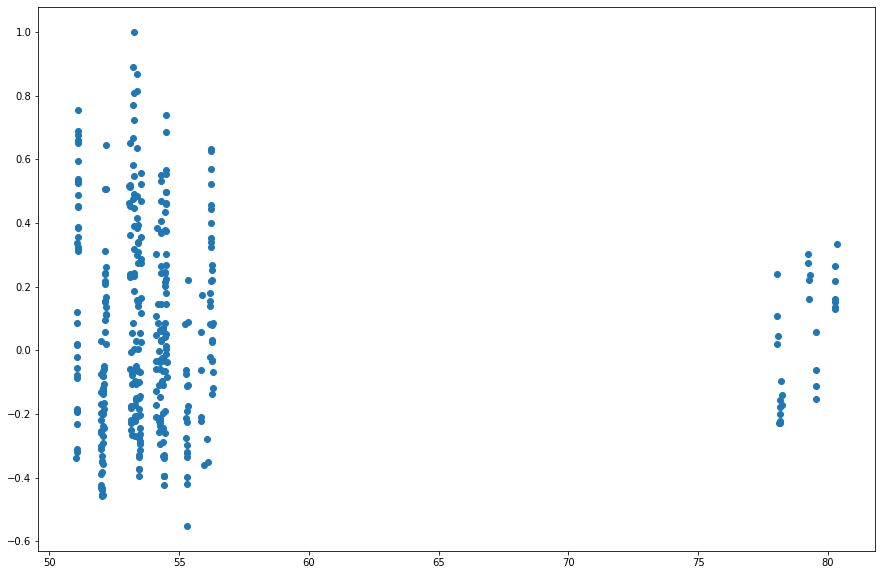

In [13]:
#data=pd.read_csv("BeltonLightcurves.csv")
print(times)

plt.figure(figsize=(15,10))
plt.scatter(times,mags)
plt.show()